<b>Analysis</b>
* On the point of comparing placebo to the rest of the group, the placebo seems to not be as deadly as much as the other drugs over the time period this was measured as the placebo had one of the highest survival rates. The placebo and the Capomulin drug had the highest survival rates.


* Ramicane and Capomulin were the only drugs that seemed to have a positive effect on the tumor volume over the course of the treatment. The rest seemed to get gradually worse. Those two would be the only successful drugs.


* The placebo and many other drugs had very similar tumor volume increase rates as time went on. The fact that the other drugs did the same as the placebo may have meant they weren't even better than not taking those drugs. The only drugs you would want to care about were Ramicane and Capomulin to take an effect.




In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_trial_complete = pd.merge(mouse_data, clinical_trial_data, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
clinical_trial_complete.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_df = pd.DataFrame(clinical_trial_complete.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
# Convert to DataFrame


mean_df.head()
# Preview DataFrame


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame
sems_df = pd.DataFrame(clinical_trial_complete.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])
# Convert to DataFrame
sems_df.head()




Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
#clinical_trial_complete['Timepoint'].unique()


mean_df = mean_df.unstack(level = 0)
mean_df.columns = mean_df.columns.get_level_values(1)
mean_df
# Preview that Reformatting worked




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
sems_df = sems_df.unstack(level=0)
sems_df.columns = sems_df.columns.get_level_values(1)
sems_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


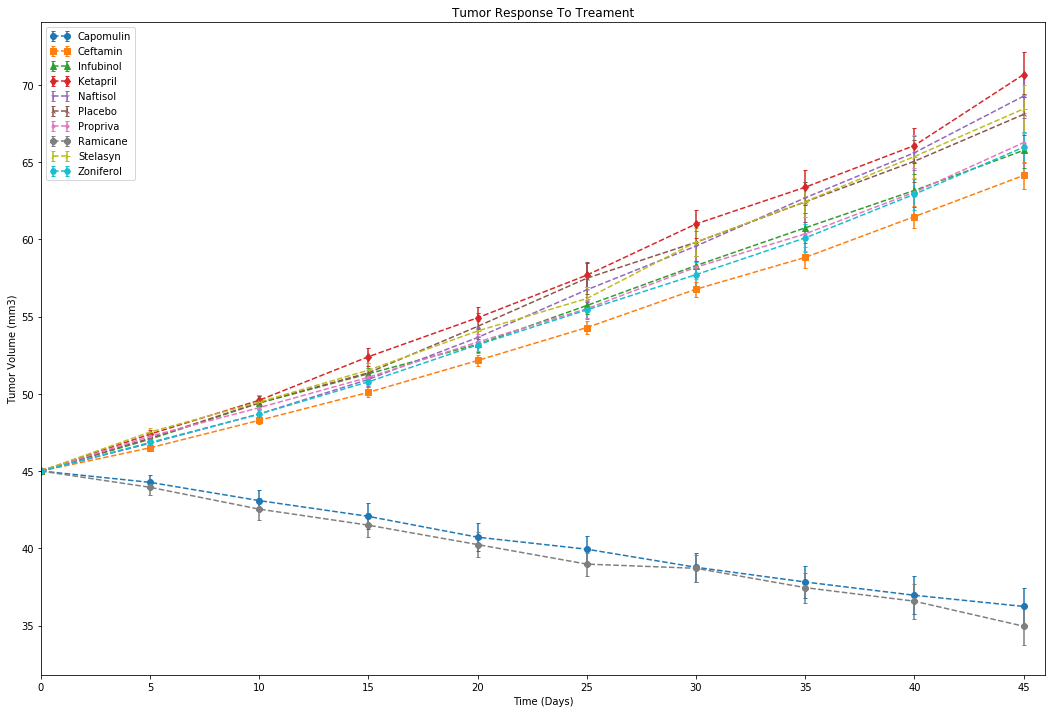

In [6]:
#plot options
plt.figure(figsize = (18,12))
plt.title('Tumor Response To Treament')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(np.arange(0, mean_df.index.max()+4 , 5)) # location of separators for timepoint
plt.xlim(0, mean_df.index.max() + 1) 

markers = ['o', 's', '^', 'd', '1', '2', '.', '8', '4', 'H']

# independent variable
xvals = mean_df.index #timepoints

#count for markers in plot loop
count = 0

#plot each tumor volume column with standard error
for c in mean_df.columns:
    plt.errorbar(xvals, 
                 mean_df[c], 
                 sems_df[c], #std error
                 linestyle = '--', 
                 marker =  markers[count],
                 capthick = 1, #for caps on error bars 
                 capsize = 2
                )  # for caps on error bars
    count += 1

#legend options
lg = plt.legend(numpoints = 2, # gives two symbols in legend
                frameon = True)
plt.show()


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

mean_tumor_df = pd.DataFrame((clinical_trial_complete.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']))
mean_tumor_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

sem_tumor_df = pd.DataFrame((clinical_trial_complete.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']))
sem_tumor_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
mean_tumor_df = mean_tumor_df.unstack(level=0)
mean_tumor_df.columns = mean_tumor_df.columns.get_level_values(1)
mean_tumor_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [10]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

#Example is making me confused in instructions so I'm assuming values should be Metastatic Sites
sem_tumor_df = sem_tumor_df.unstack(level=0)
sem_tumor_df.columns = sem_tumor_df.columns.get_level_values(1)
sem_tumor_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


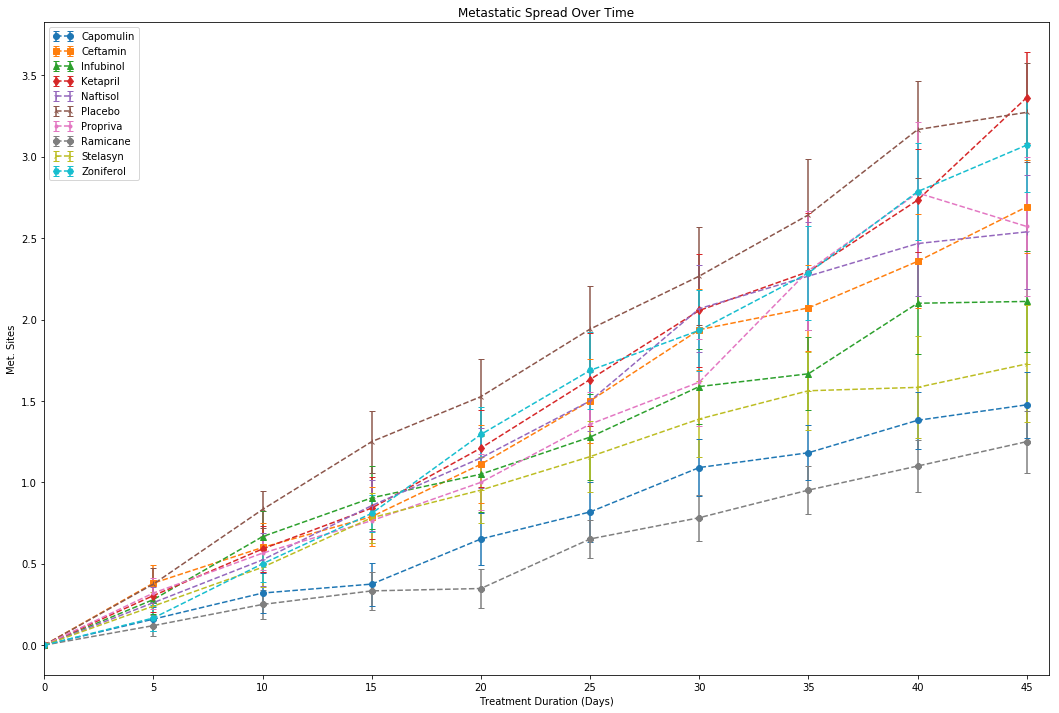

In [11]:
#plot options
plt.figure(figsize = (18,12))
plt.title('Metastatic Spread Over Time')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.xticks(np.arange(0, mean_tumor_df.index.max()+3 , 5)) 
plt.xlim(0, mean_tumor_df.index.max() + 1) 

markers = ['o', 's', '^', 'd', '1', '2', '.', '8', '4', 'H']

xValues = mean_tumor_df.index

count = 0

for c in mean_tumor_df.columns:
    plt.errorbar(xvals, 
                 mean_tumor_df[c], 
                 sem_tumor_df[c], 
                 linestyle = '--', 
                 marker =  markers[count], 
                 capthick = 1, 
                 capsize = 3)  
    count += 1

#legend options
lg = plt.legend(numpoints = 2,
                frameon = True)
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame
ourDf = pd.DataFrame(clinical_trial_complete.groupby(['Drug', 'Timepoint']).size())
ourDf.columns = ['Mouse Count']
ourDf.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [13]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
mouseCountDf = ourDf.pivot_table(values='Mouse Count', index=ourDf.index.get_level_values(1), columns='Drug', aggfunc='first')


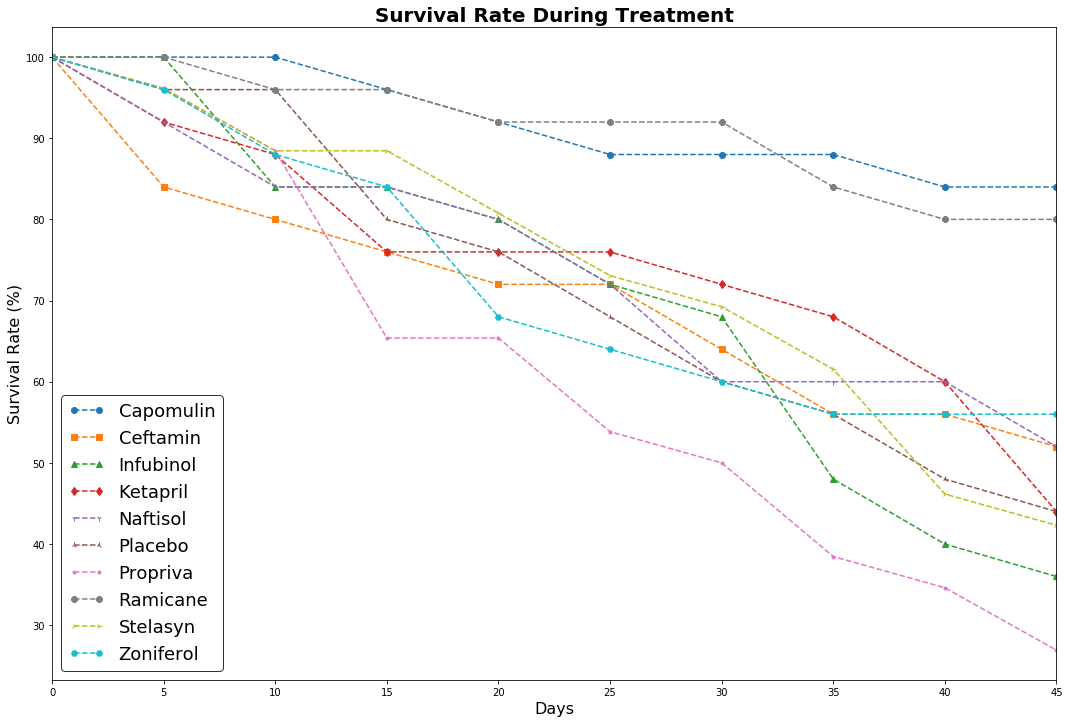

In [14]:

plt.figure(figsize = (18,12))
plt.xlabel('Days', fontdict = {'fontsize': 16})
plt.ylabel('Survival Rate (%)', fontdict = {'fontsize': 16})
plt.xlim(0, mouseCountDf.index.max())


xValues = mouseCountDf.index

markers = ['o', 's', '^', 'd', '1', '2', '.', '8', '4', 'H']

count = 0 

for c in mouseCountDf:
    yValues = (mouseCountDf[c]/mouseCountDf.loc[0,c]) * 100 
    plt.plot(xValues, 
             yValues, 
             linestyle = '--', 
             marker =  markers[count],
             )
    count += 1
    

plt.legend(numpoints = 2, 
                frameon = True, 
                edgecolor = 'black', 
                fontsize = '18')

plt.title('Survival Rate During Treatment', fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.show()

## Summary Bar Graph

In [15]:

tumorMungeDf = (mean_df.loc[45, :] - mean_df.loc[0, :])/mean_df.loc[0, :] * 100

tumorMungeDf.head()
# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
dtype: float64

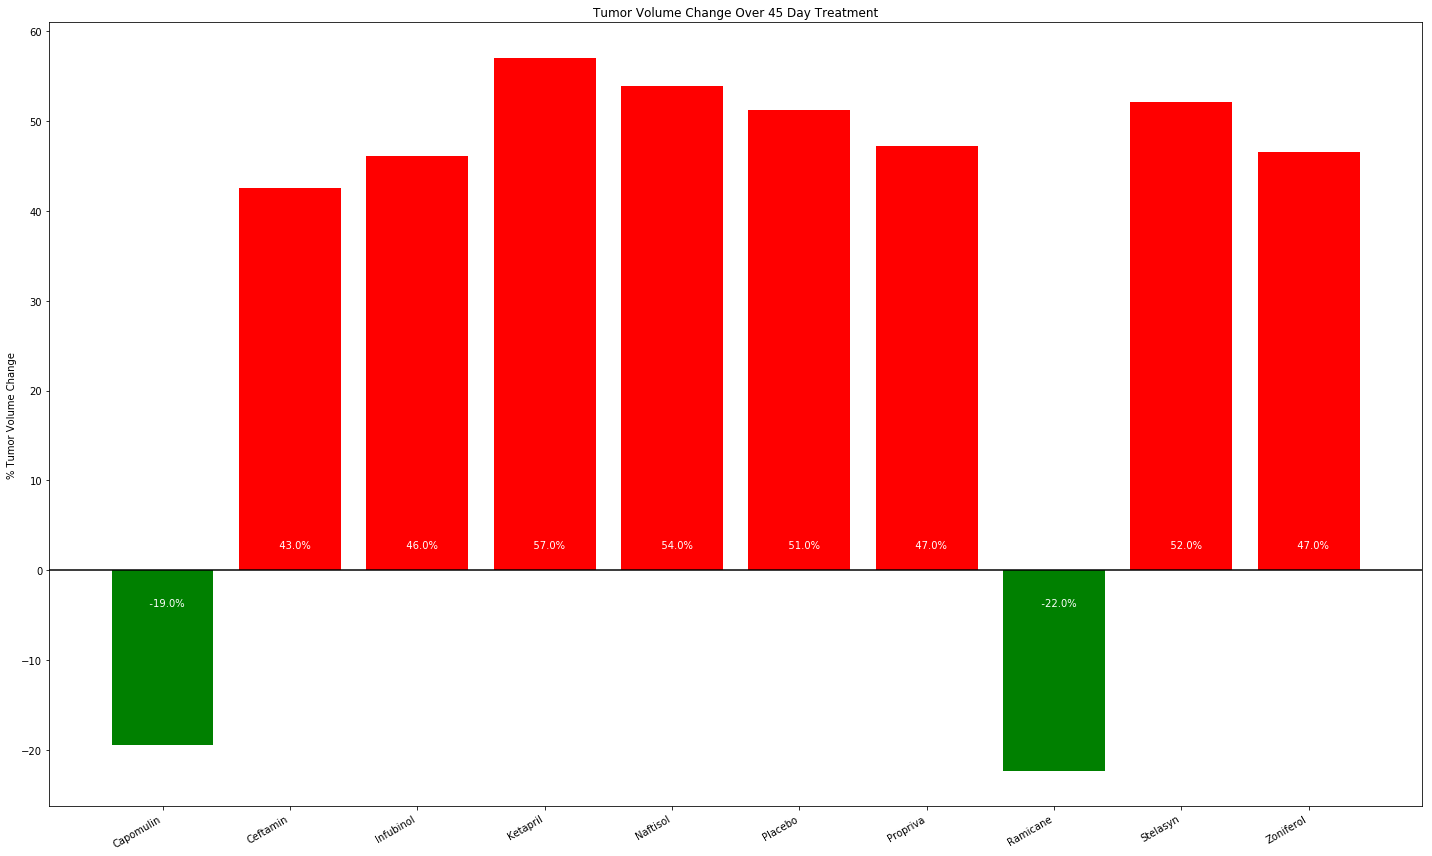

In [17]:
# Store all Relevant Percent Changes into a Tuple

# Orient widths. Add labels, tick marks, etc. 

plt.tight_layout()
# Use functions to label the percentages of changes
plt.title('Tumor Volume Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.axhline(y=0, color = 'black')
xlabels = tumorMungeDf.index

plt.xticks(np.arange(len(xlabels)), xlabels, rotation=30, ha='right')

plt.bar(np.arange(len(xlabels)), 
        tumorMungeDf, 
        color = ['red' if tumorMungeDf[r] > 0 else 'green' for r in np.arange(len(xlabels))]
       )

count = 0

for tumor in tumorMungeDf:
    if tumor < 0:
        y_coor = -4
    else:
        y_coor = 2.5
    plt.text(count, y_coor, '   '+str(round(tumor)) + '%', ha = 'center', color = 'white')
    count += 1
plt.tight_layout()
plt.rcParams["figure.figsize"] = (20,12)
plt.show()
# Show the Figure
#fig.show()